In [3]:
import pandas as pd
import numpy as np
from cluster_vis import cluster_visualizer

In [4]:
vis = cluster_visualizer()

In [5]:
vis.two_dimension_plot()

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 864x864 with 0 Axes>

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


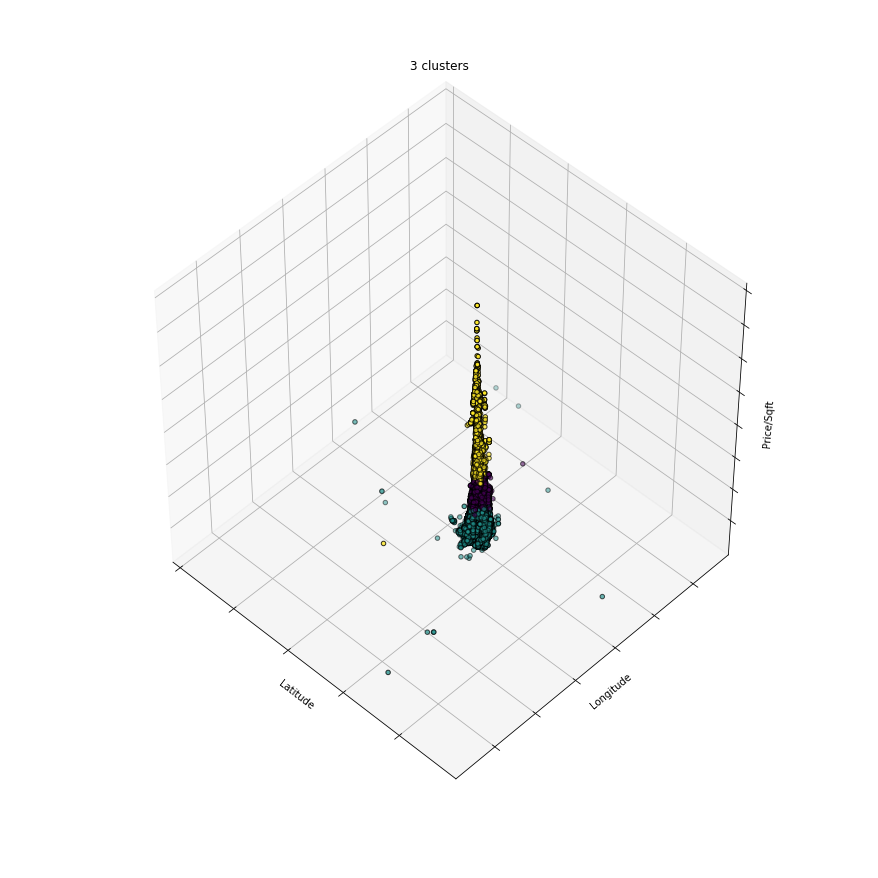

In [6]:
vis.three_dimension_plot()